# Idea: Cleaning Data

## Topic- Trending YouTube Video Statistics (INDIA) 

https://www.kaggle.com/datasets/datasnaek/youtube-new?select=INvideos.csv

Our main goal is to perform data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete data within a dataset.

## Importing Packages

In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import json

In [40]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [4]:
#Basic configurations for improving visualization of graphs

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Reading the dataset

In [41]:
df = pd.read_csv('INvideos.csv')

### Let's get a feel of what our dataset looks like by displaying its first few rows

In [42]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


Now, let's see some information about our dataset using the info() method.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

We can see that there are 37,352 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 37,352 non-null entries) except for description column which has some null values; it only has 36,791 non-null values.

# Data Cleaning

The description column has some rows containing null values represented by NaN. Let's have a look at them.

In [44]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13T06:03:49.000Z,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12T09:45:58.000Z,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12T03:53:49.000Z,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the description column.

In [46]:
df["description"] = df["description"].fillna(value="")

In [47]:
# Obtain summary statistics
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

       category_id        views      likes   dislikes  comment_count
count     37352.00     37352.00   37352.00   37352.00       37352.00
mean         21.58   1060477.65   27082.72    1665.08        2677.00
std           6.56   3184932.05   97145.10   16076.17       14868.32
min           1.00      4024.00       0.00       0.00           0.00
25%          23.00    123915.50     864.00     108.00          81.00
50%          24.00    304586.00    3069.00     326.00         329.00
75%          24.00    799291.25   13774.25    1019.25        1285.00
max          43.00 125432237.00 2912710.00 1545017.00      827755.00


## Duplicate Removal

In [48]:
# Check for duplicates based on all columns
duplicates_all_columns = df[df.duplicated()]

# Check for duplicates based on specific columns
# For example, if you want to check for duplicates based on 'video_id' column
duplicates_video_id = df[df.duplicated(subset=['video_id'])]

# Print the duplicate rows
print("Duplicate rows based on all columns:\n", duplicates_all_columns)
print("\nDuplicate rows based on 'video_id' column:\n", duplicates_video_id)

Duplicate rows based on all columns:
           video_id trending_date  \
1689   YAzs-timxnI      17.22.11   
1690   ZJDMWVZta3M      17.22.11   
1691   RVpnz8mbVDI      17.22.11   
1692   CfZSYm-mFgI      17.22.11   
1693   m1PDqdLQMv8      17.22.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title        channel_title  \
1689   Swag Se Swagat Song | Official Teaser | Salman...                  YRF   
1690               Incredibles 2 Official Teaser Trailer         Disney•Pixar   
1691   Jaisi Karni Waisi Bharni - | Lalit Shokeen Fil...       LShokeen Films   
1692   Bomma Adhirindhi Song Trailer | Jawaan Telugu ...  Arunachal Creations   
1693           Miss World 2017 Top 5 Question and Answer      Beauty Pageants   
...                                        

In [49]:
# Drop duplicates based on all columns
df_cleaned_all_columns = df.drop_duplicates()

# Drop duplicates based on the 'video_id' column
df_cleaned_video_id = df.drop_duplicates(subset=['video_id'])

# Print the shape of the cleaned DataFrames to compare the number of rows before and after cleaning
print("Number of rows before cleaning based on all columns:", df.shape[0])
print("Number of rows after cleaning based on all columns:", df_cleaned_all_columns.shape[0])

print("Number of rows before cleaning based on 'video_id' column:", df.shape[0])
print("Number of rows after cleaning based on 'video_id' column:", df_cleaned_video_id.shape[0])

# Optionally, we overwrite the original DataFrame with the cleaned one
# df = df_cleaned_all_columns  # or df = df_cleaned_video_id

Number of rows before cleaning based on all columns: 37352
Number of rows after cleaning based on all columns: 33089
Number of rows before cleaning based on 'video_id' column: 37352
Number of rows after cleaning based on 'video_id' column: 16307


## Outlier Detection

In [50]:
# Specify the numerical columns you want to check for outliers
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Calculate z-scores for the numerical columns
z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Find outliers
outliers = df[(z_scores > threshold).any(axis=1)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
          video_id trending_date  \
17     ePO5M5DE01I      17.14.11   
90     2Vv-BfVoq4g      17.14.11   
213    nLFX8rBUNdk      17.15.11   
221    c64I9HNpiOY      17.15.11   
262    ePO5M5DE01I      17.15.11   
...            ...           ...   
37191  64UX1npgRkI      18.14.06   
37302  TIE92mUvSsw      18.14.06   
37304  Zqv5CBWt9yA      18.14.06   
37308  BAp-LNDkGOg      18.14.06   
37313  64UX1npgRkI      18.14.06   

                                                   title       channel_title  \
17     Tiger Zinda Hai | Official Trailer | Salman Kh...                 YRF   
90           Ed Sheeran - Perfect (Official Music Video)          Ed Sheeran   
213    Flipkart Billion Capture+ Unboxing and First L...    Technical Guruji   
221    Padmavati : Ek Dil Ek Jaan Video Song | Deepik...            T-Series   
262    Tiger Zinda Hai | Official Trailer | Salman Kh...                 YRF   
...                                                  ...                 ... 

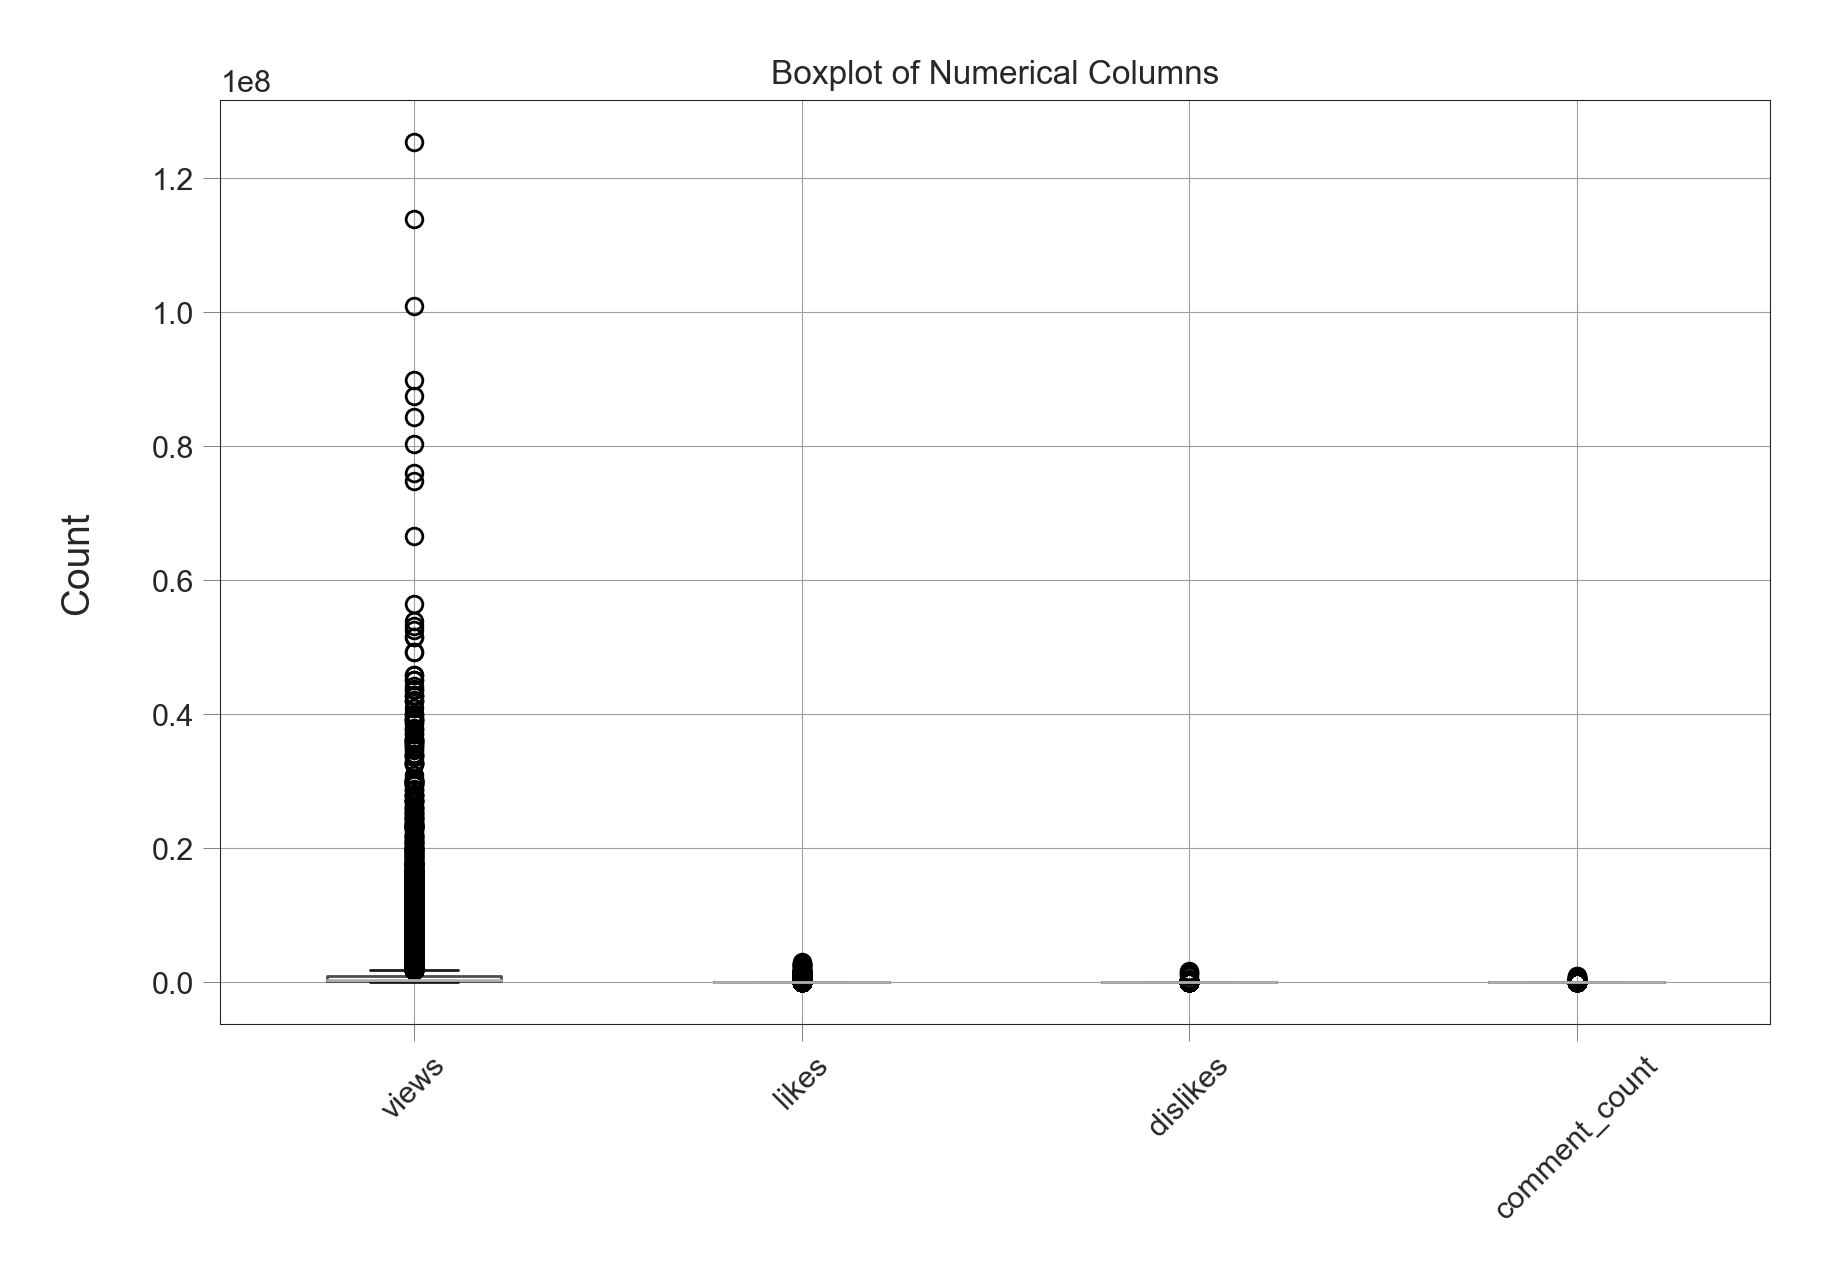

In [51]:
# Specify the numerical columns you want to check for outliers
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Create boxplots for the numerical columns
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In the provided data, outliers have been observed in the numerical columns representing metrics such as 'views'.

In [54]:
# Specify the numerical columns you want to standardize
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the first few rows of the standardized DataFrame
print(df.head())

      video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   
3  N1vE8iiEg64      17.14.11   
4  kJzGH0PVQHQ      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

   category_id              publish_time  \
0            1  2017-11-12T12:20:39.000Z   
1           25  2017-11-13T05:43:56.000Z   
2           24  2017-11-12T15:48:08.000Z   
3           23  2017-11-12T07:08:48.000Z   
4           24  2017-11-13T01:14:16.000Z   

                                                tags  views  likes  dislikes  \
0  sharry mann|"sharry 

## Description of numerical columns

Now, let's see some statistical information about the numerical columns of our dataset

In [35]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.00,37352.00,37352.00,37352.00,37352.00
mean,21.58,1060477.65,27082.72,1665.08,2677.00
std,6.56,3184932.05,97145.10,16076.17,14868.32
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123915.50,864.00,108.00,81.00
50%,24.00,304586.00,3069.00,326.00,329.00
75%,24.00,799291.25,13774.25,1019.25,1285.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00


We note from the table above that

* The average number of viewson a trending video is `1,060,477`. The median value for the number of views is `304,586` , which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
* The average number of likes on a trending video is `27,082` , while the average number of dislikes is `1,665`. 
* The average comment count is `2,677` while the median is `329`.

## Views Histogram

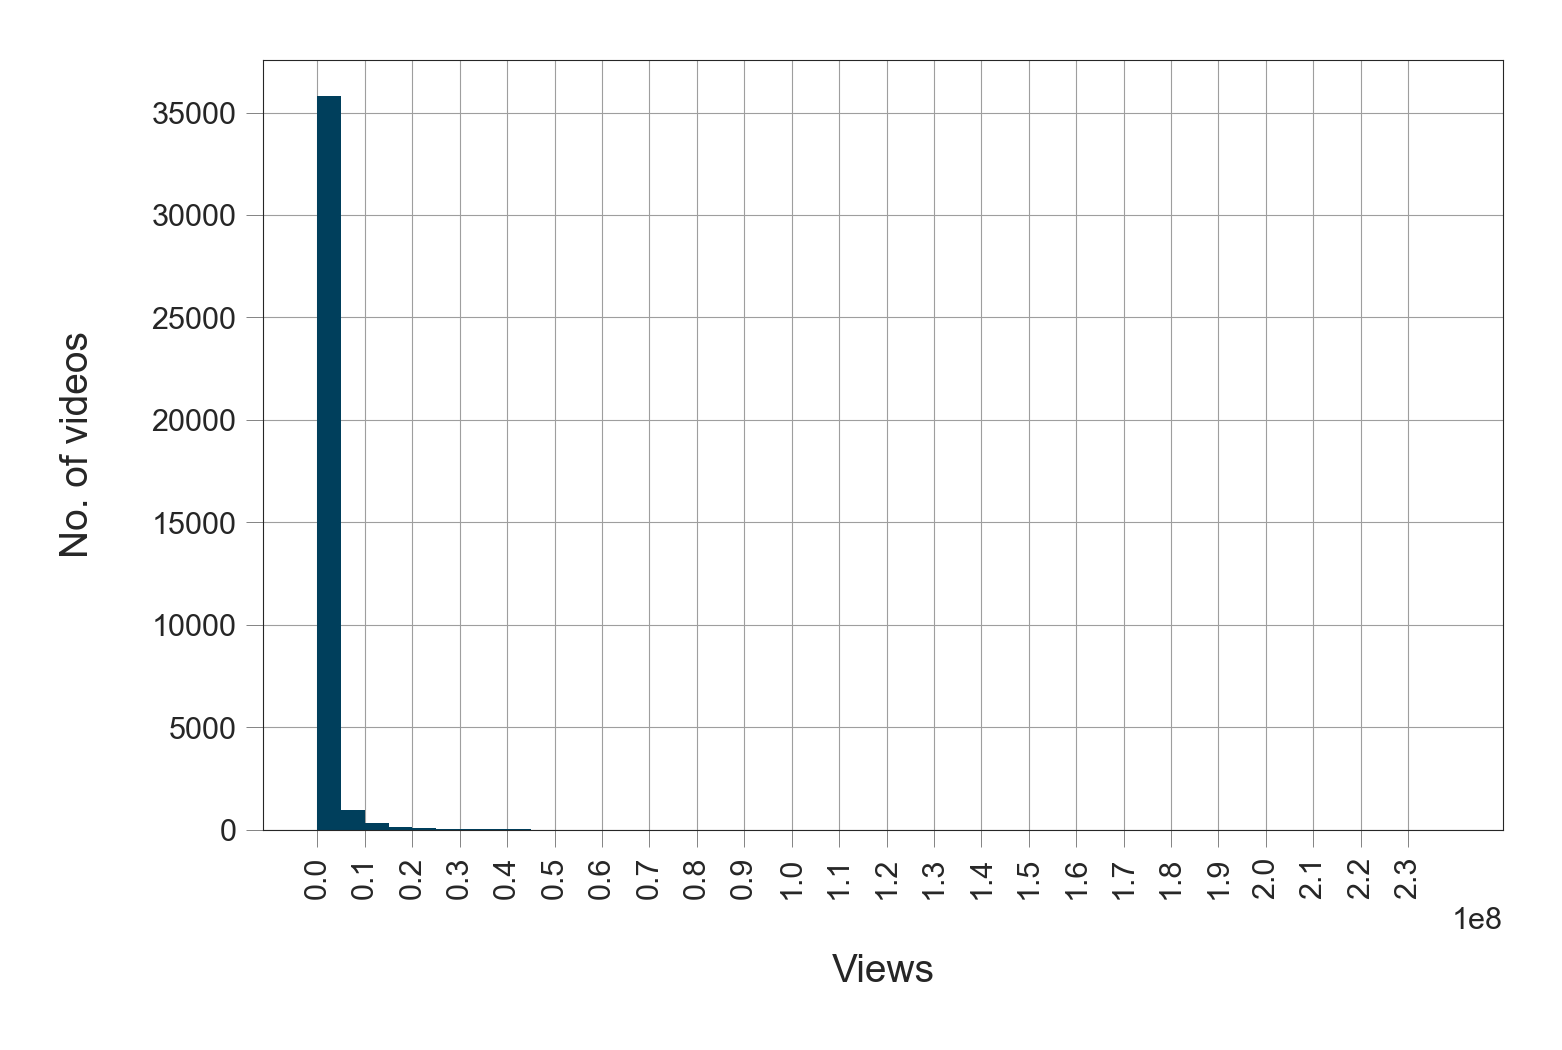

In [13]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

Now let's plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data.

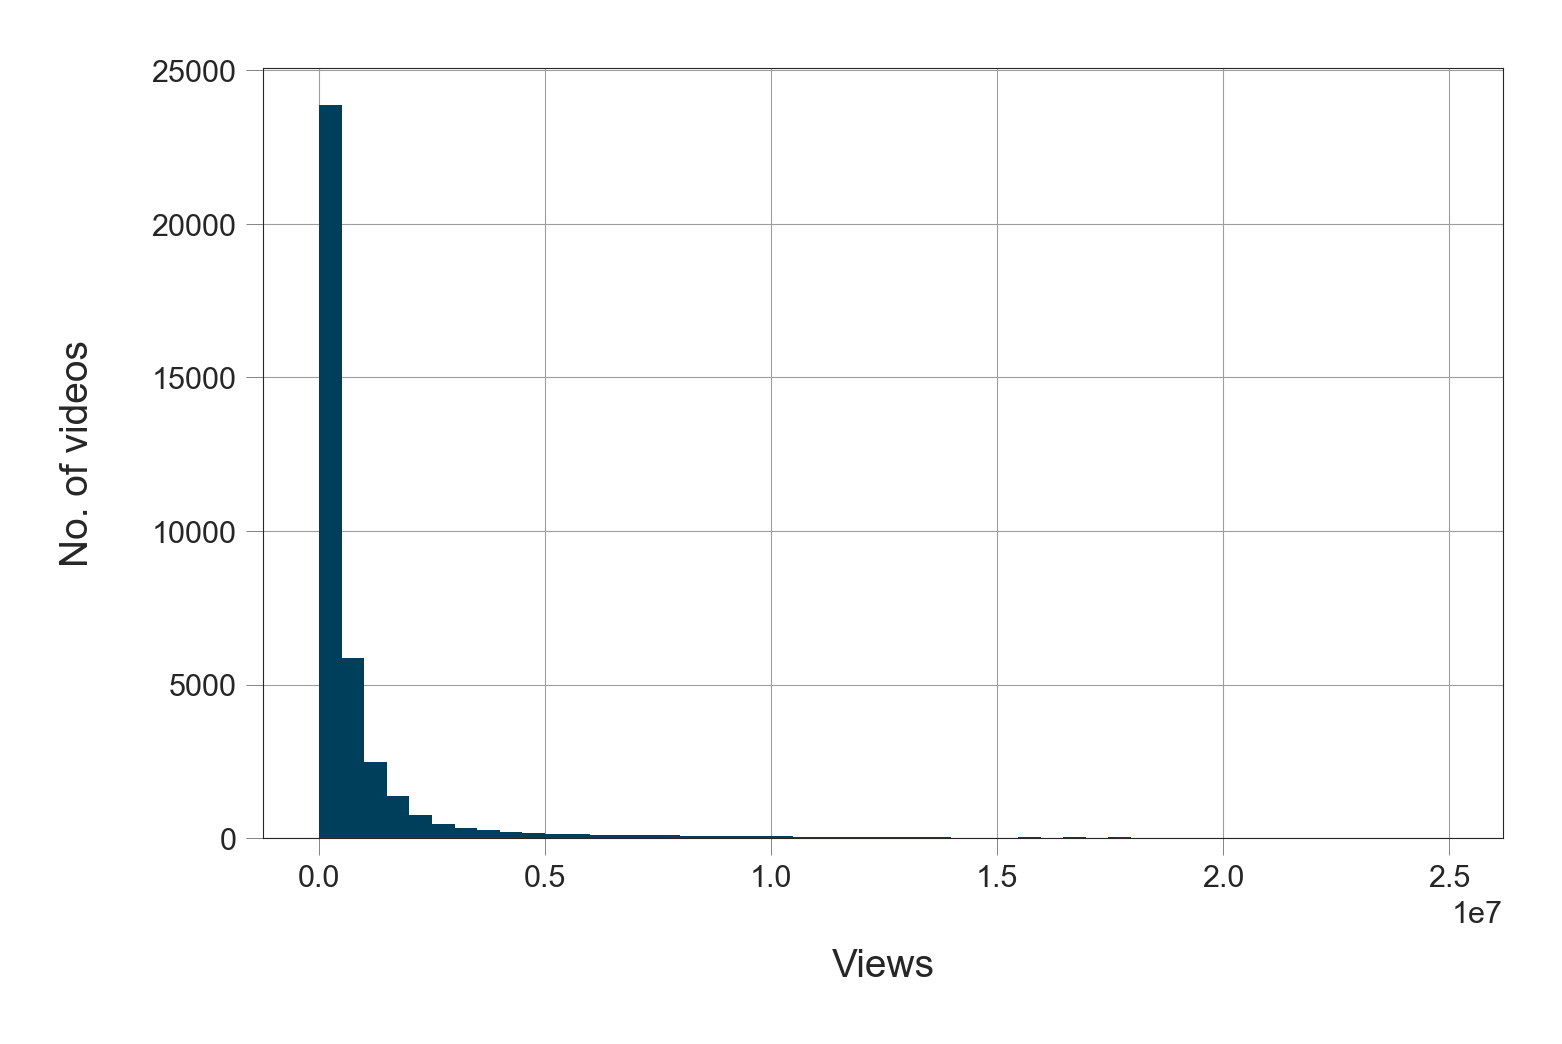

In [14]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Now we see that the majority of trending videos have 1 million views or less.

## Likes Histogram

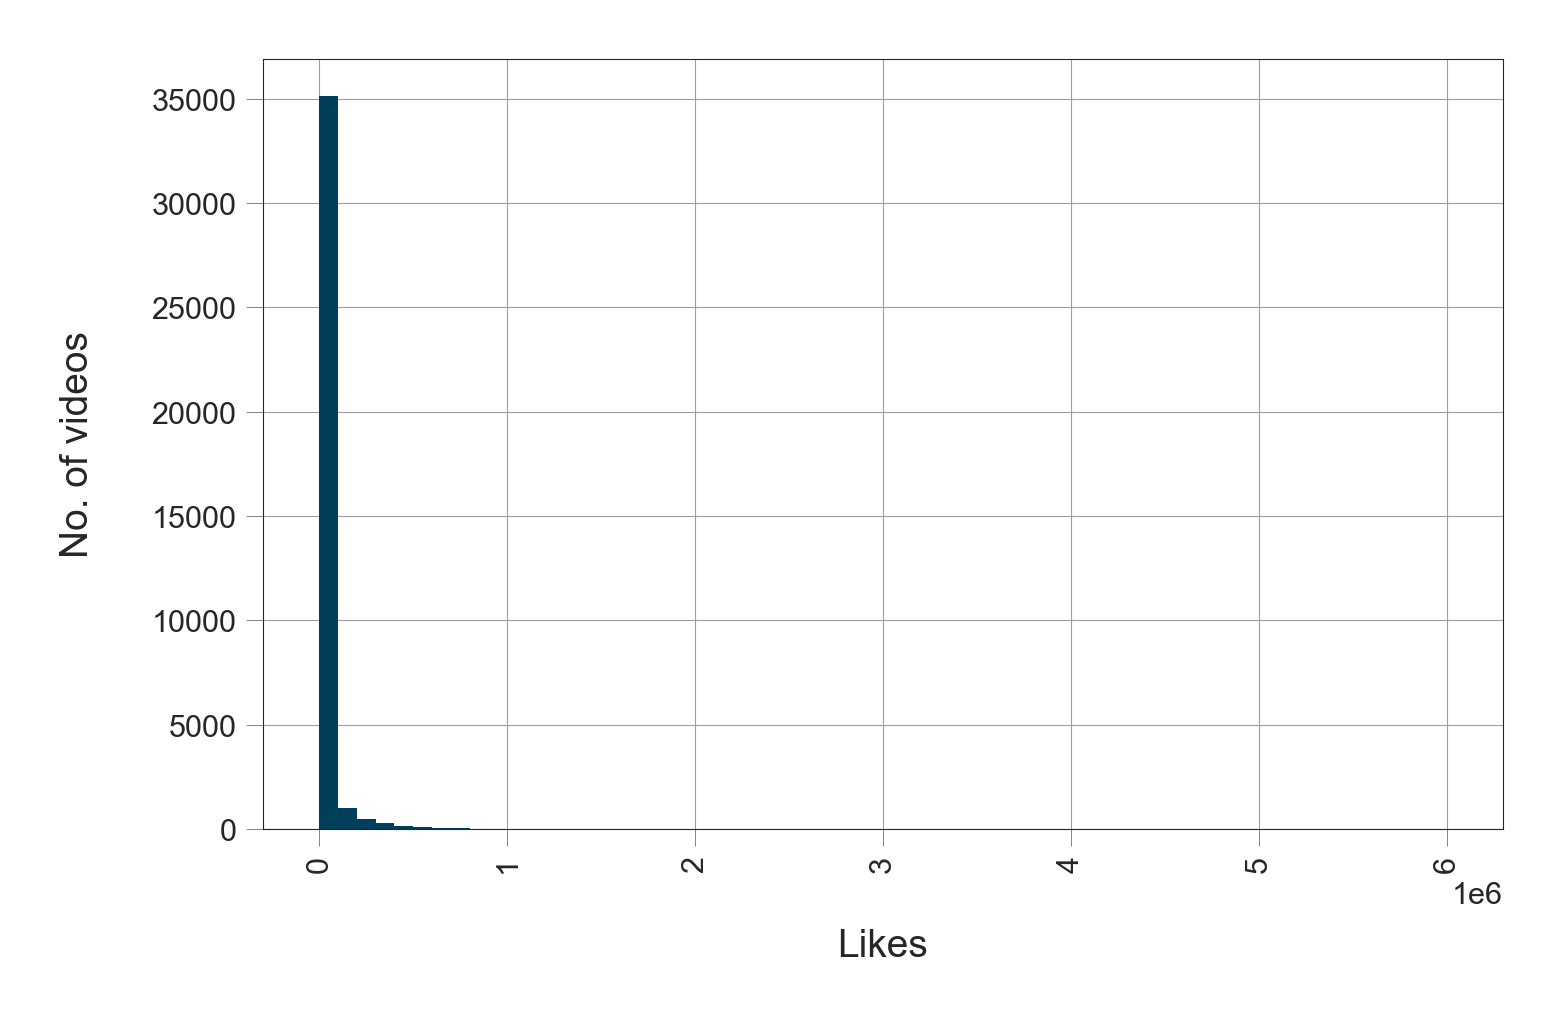

In [18]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have between 0 and 100,000 likes. Let's plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

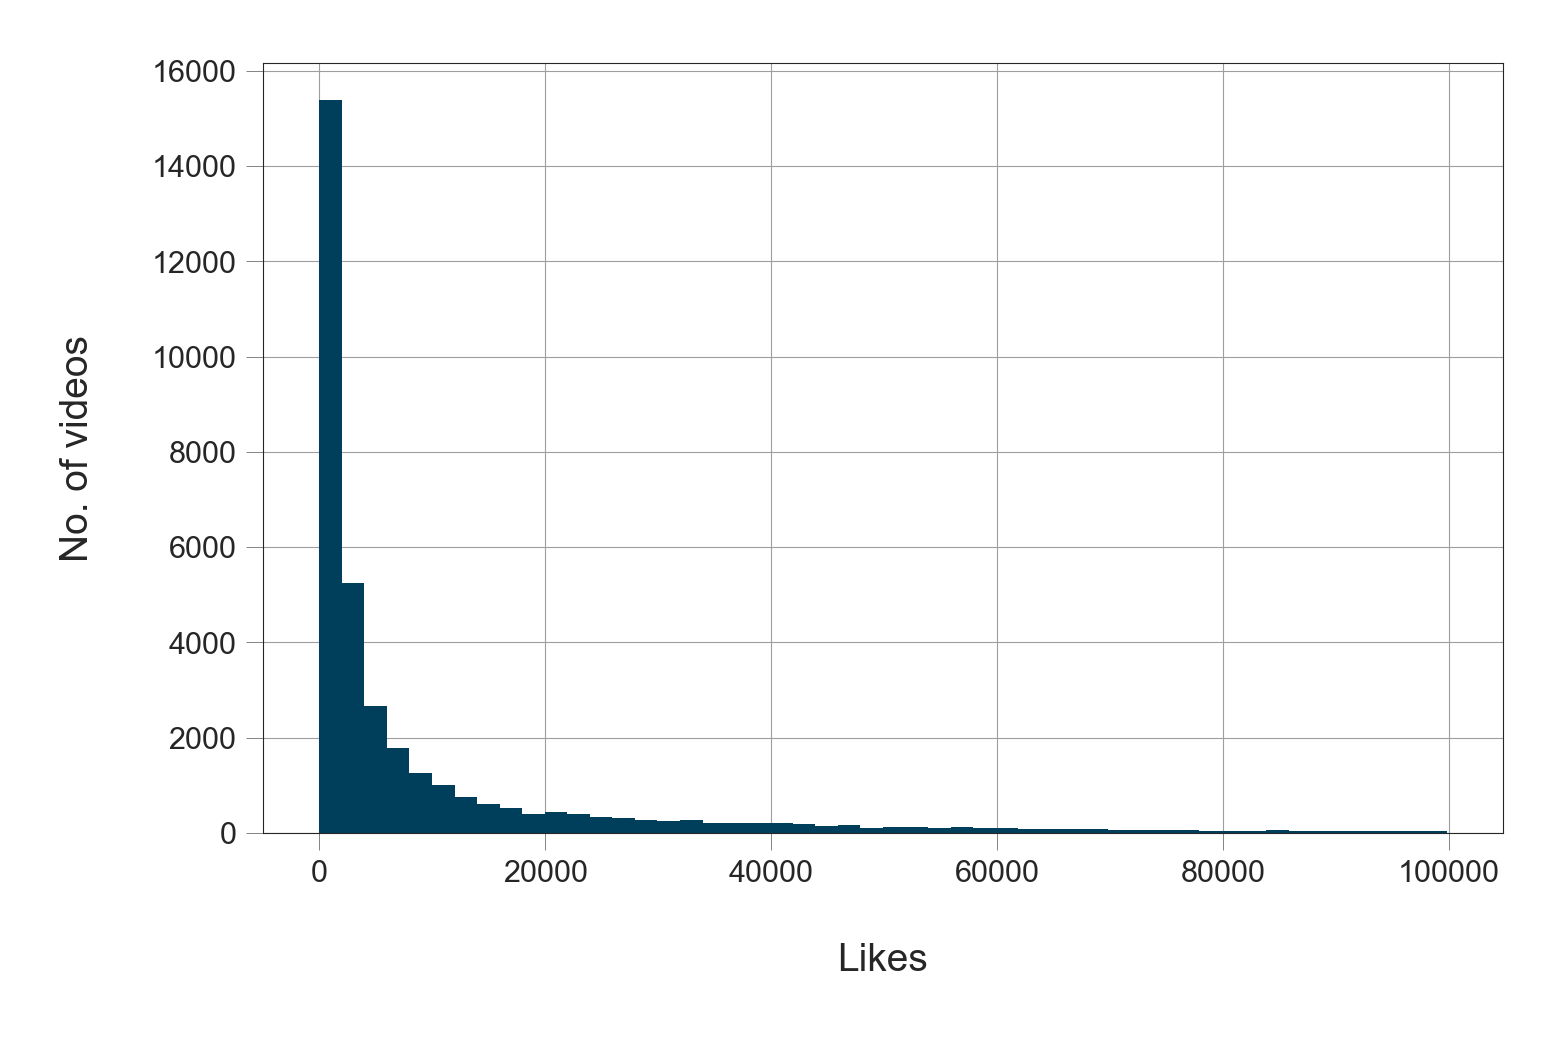

In [19]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.

 

## Comment Count Histogram

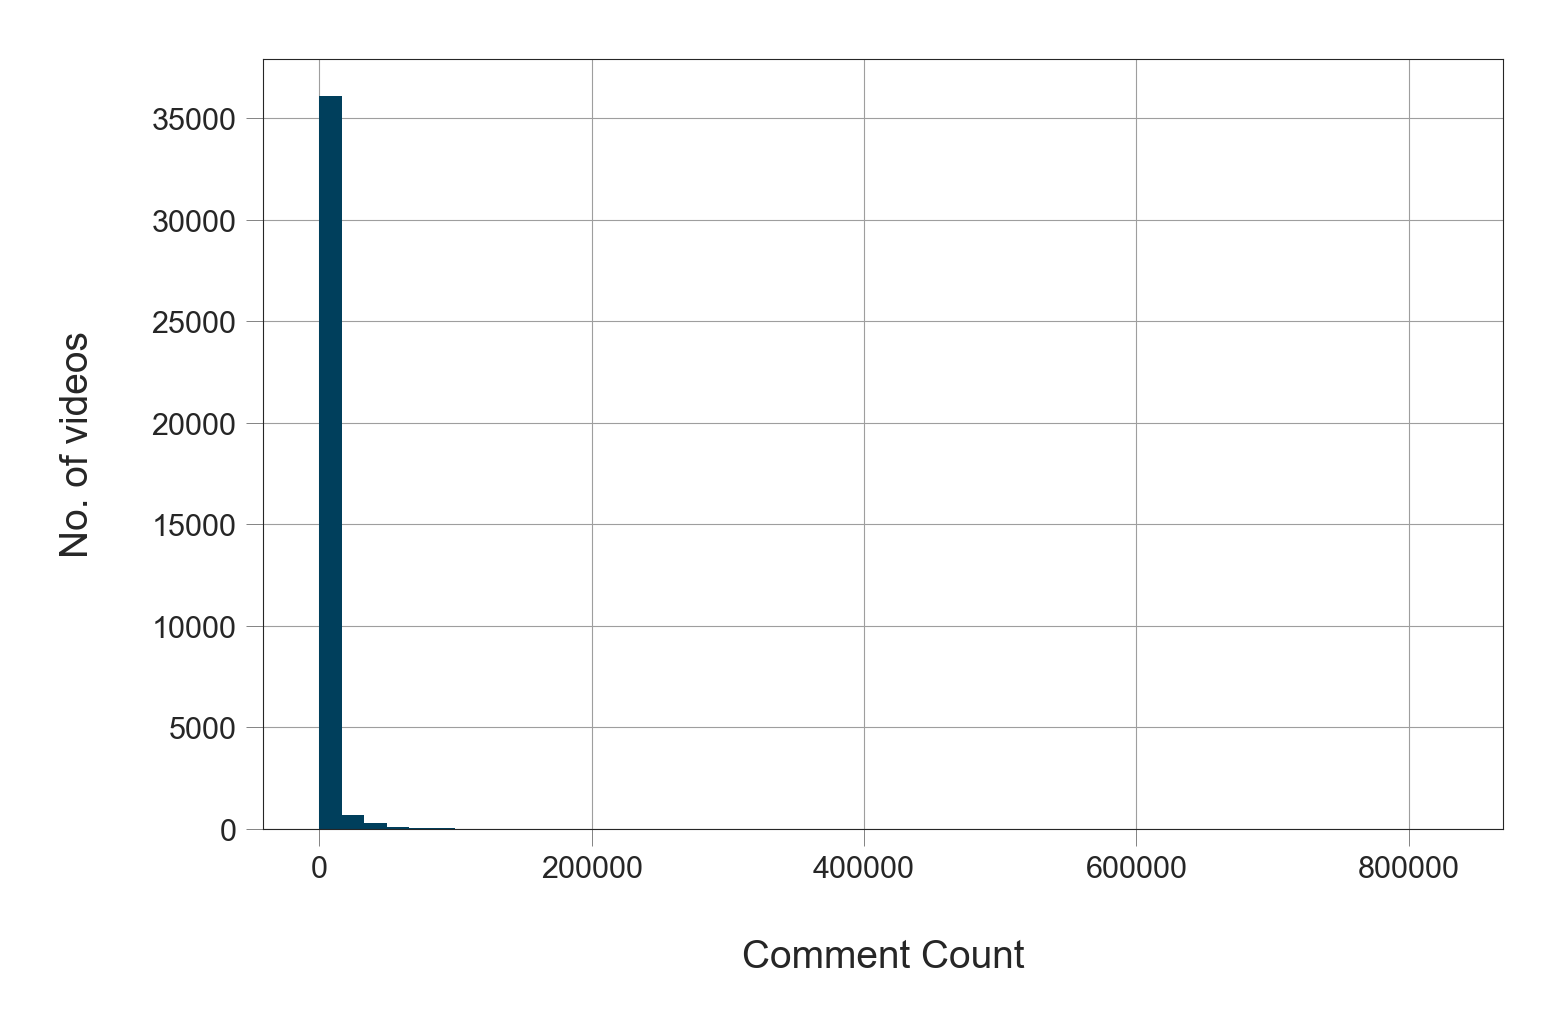

In [22]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Let's get a closer look by eliminating entries with comment count larger than `200000`.

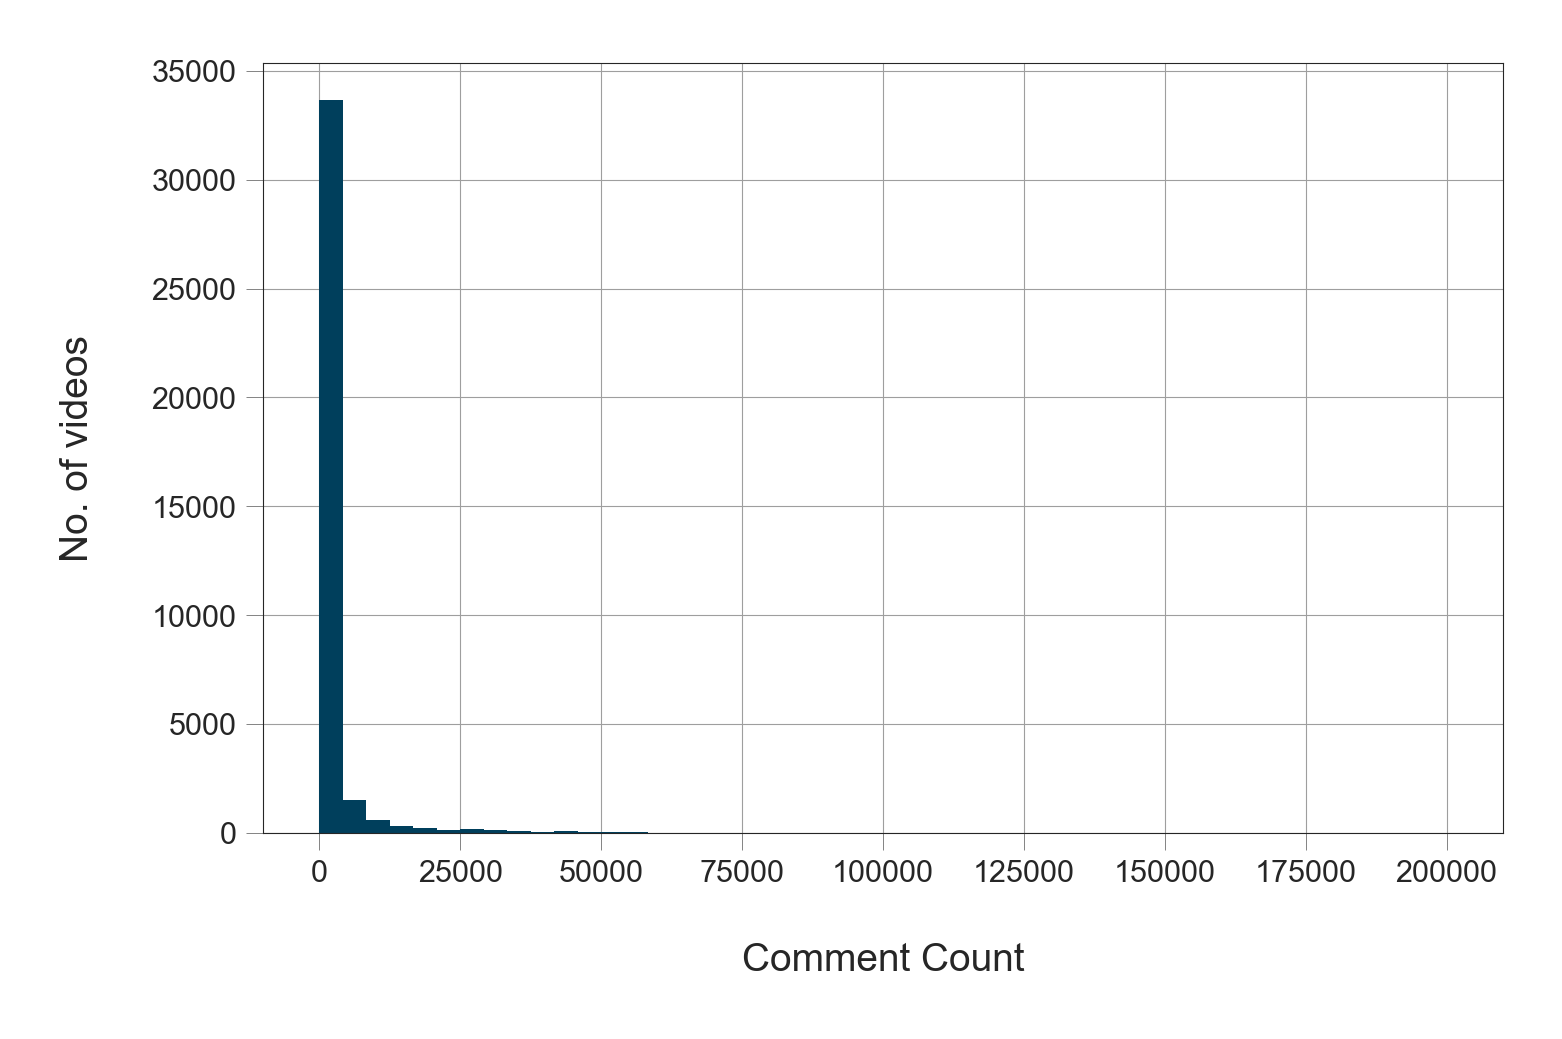

In [23]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

$$\frac{25000}{7}≈3571 \ comments $$
 
since each division in the graph has seven histogram bins.

## Description of non-numerical columns

After we are done with numerical columns of our dataset, let's move to non-numerical columns of the dataset.

In [26]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,37352
unique,16307,205,16721,1426,16339,12578,16523,13993
top,#NAME?,17.14.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,
freq,511,200,19,284,18,1381,16,561


Dates: There are 205 unique dates in the dataset, indicating that the data spans over 205 days.

Video IDs: There are 37,352 videos in total, with 16,307 unique video IDs. This suggests that some videos appeared on the trending list on multiple days.

Video Titles: While there are 16,307 unique video IDs, there are 16,721 unique video titles. This discrepancy could imply that some videos had their titles modified between appearances on the trending list.

Top Frequent Title: The most frequently occurring title is "Mission: Impossible - Fallout (2018) - Official..." which appeared 19 times on the trending list.

Publish Time: The number of unique values in the 'publish_time' column is less than 16,307, which is expected since two different videos may be published at the same time.

In summary, the data reveals that some videos reappear on the trending list with modified titles, which explains the difference between the number of unique video IDs and unique titles. Additionally, it suggests that certain videos have a longer trending duration or experience changes in their titles over time.

To verify our interpretation for title column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles.

In [27]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
134,#NAME?,17.14.11,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,Friday Poster,24,2017-11-13T08:59:27.000Z,"స‌మంత కంట‌త‌డి|""Samantha became EMOTIONAL @ Sa...",31052,36,11,2,https://i.ytimg.com/vi/-b0ww7L2MGU/default.jpg,False,False,False,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...
173,#NAME?,17.14.11,कुंभ राशि वालों के लिए 12 नवंबर - 18 नवंबर का ...,Jansatta,25,2017-11-11T09:09:06.000Z,"कुंभ राशि|""Astro""|""rashi""|""कुंभ""|""jansatta""",30659,180,36,3,https://i.ytimg.com/vi/-BcG_jN6DgE/default.jpg,False,False,False,
189,#NAME?,17.14.11,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा...",Health Tips for You,26,2017-11-08T12:27:17.000Z,"tona totka|""tone""|""laal kitaab""|""lal kitaab""|""...",743321,2570,1154,294,https://i.ytimg.com/vi/-kj6W27Jj-8/default.jpg,False,False,False,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा..."
298,#NAME?,17.15.11,18 नवम्बर 2017शनि अमावस्या को जरा से काले तिल ...,AstroMitram,22,2017-11-14T05:41:47.000Z,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",28816,376,31,29,https://i.ytimg.com/vi/-X33hZ1oTXI/default.jpg,False,False,False,शनि अमावस्या 18 नवम्बर 2017 को जरा से काले तिल...
360,#NAME?,17.15.11,BEST MOM EVER- Things you would love to hear f...,Old Delhi Films,24,2017-11-14T06:52:06.000Z,"Mother|""mom""|""best mom""|""best dad ever""|""best ...",14529,1018,131,83,https://i.ytimg.com/vi/-x9Bp5lFyM0/default.jpg,False,False,False,"Things your MOTHER will never say, still you r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37136,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923,4642,908,920,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2
37194,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2
37202,#NAME?,18.14.06,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,2018-06-13T07:00:00.000Z,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burton’s all-...
37316,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2


We can clearly see that some videos appeared on the trending page with more than one video title.

Let's plot the histogram of title lengths to get an idea about the lengths of trending video titles.

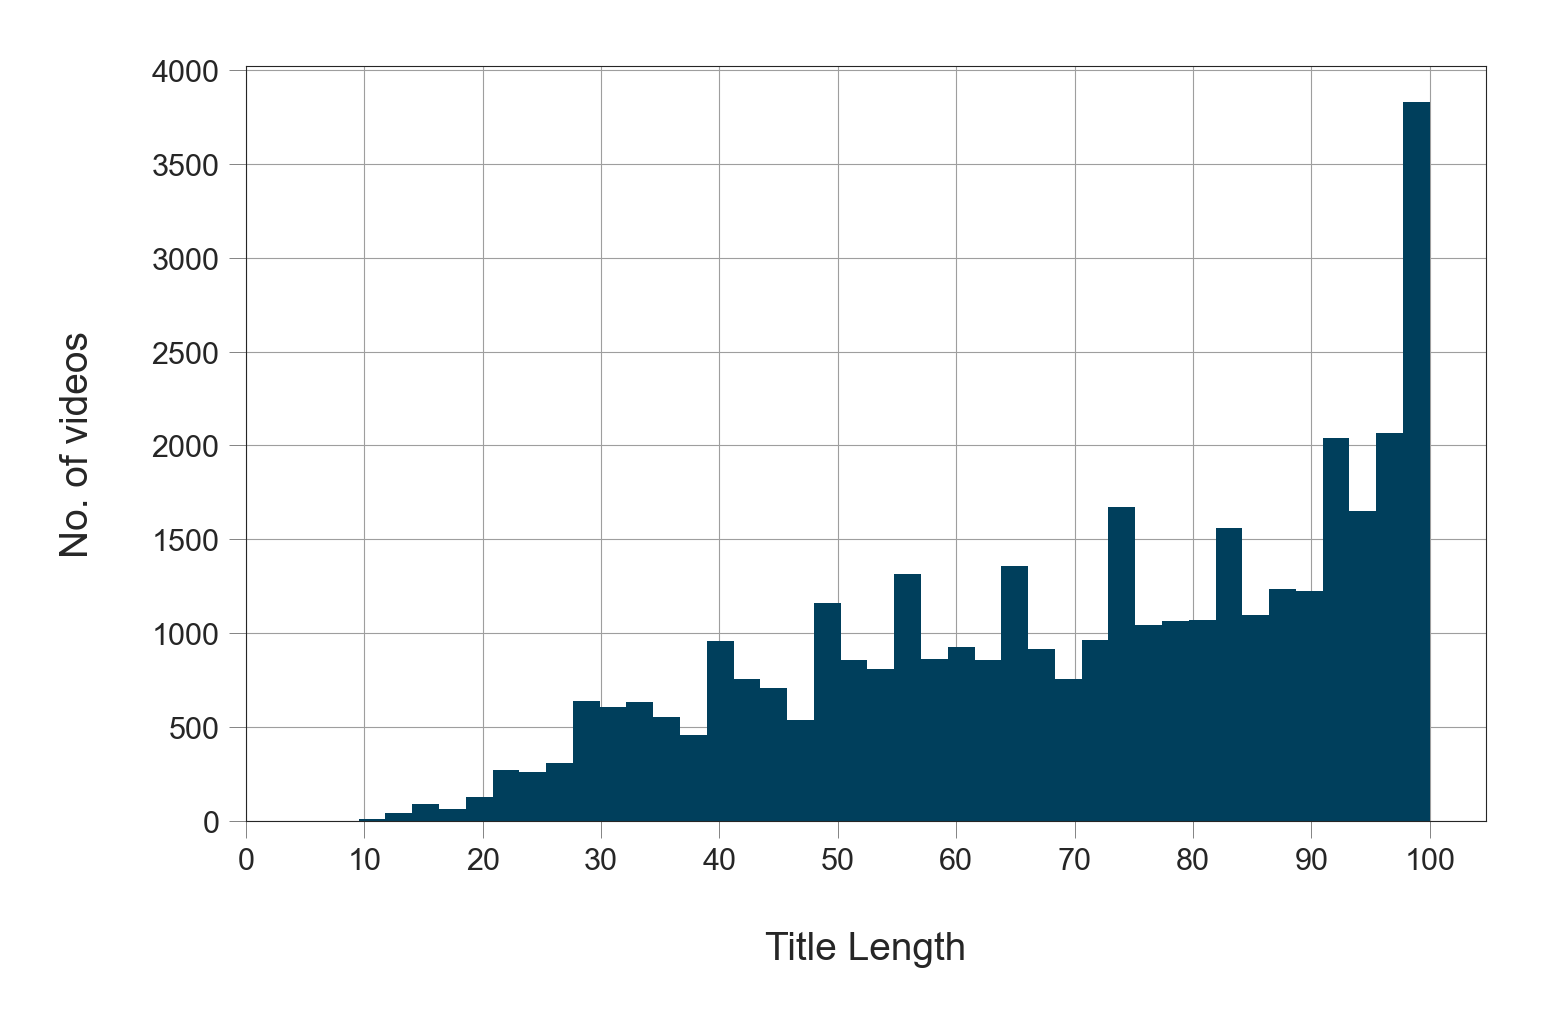

In [171]:
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that most video title has lengths around 75 to 100.

Let's draw the scatter plot to see the relation between title lengths and number of views.

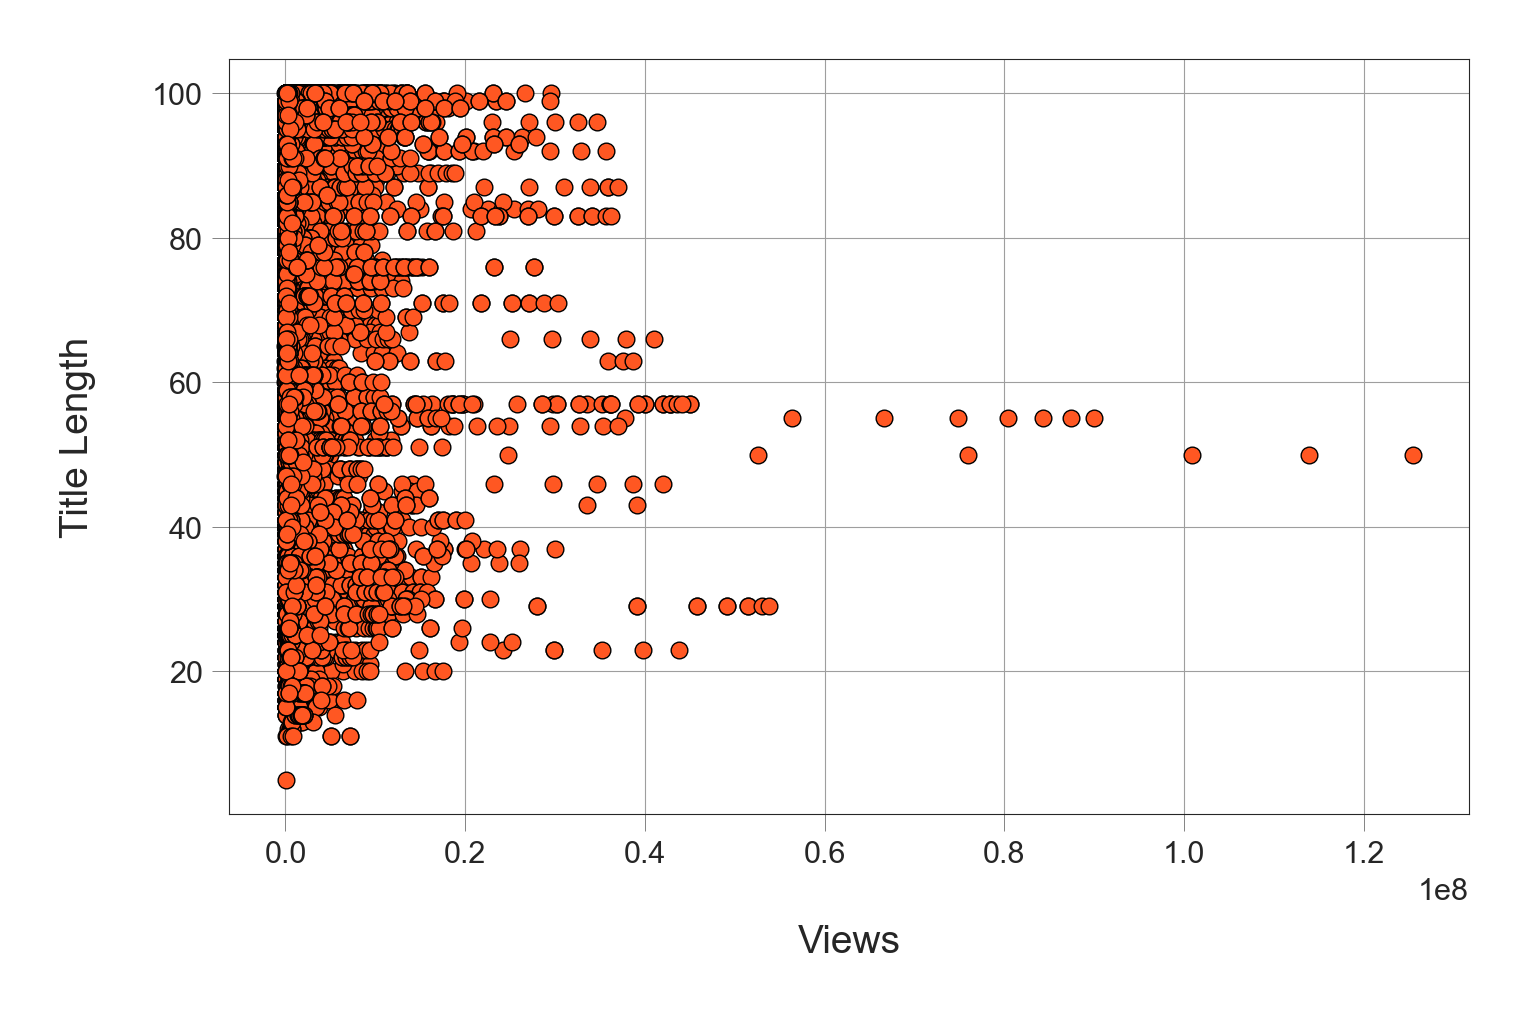

In [172]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 40,000,000 views and more have title length between 22 and 65 characters approximately whereas videos having 60,000,000 views and more have title length between 50 and 55 characters approximately.



## Correlation between dataset variables

In [173]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.18,-0.13,-0.04,-0.04,0.04,0.06,-0.05,0.02,-0.16
views,-0.18,1.00,0.85,0.54,0.67,-0.03,-0.03,0.00,-0.02,-0.05
likes,-0.13,0.85,1.00,0.49,0.78,-0.05,-0.04,0.03,-0.01,-0.17
dislikes,-0.04,0.54,0.49,1.00,0.71,-0.01,-0.02,0.00,-0.01,-0.03
comment_count,-0.04,0.67,0.78,0.71,1.00,-0.03,-0.02,0.02,0.01,-0.12
comments_disabled,0.04,-0.03,-0.05,-0.01,-0.03,1.00,0.35,-0.00,-0.02,0.09
ratings_disabled,0.06,-0.03,-0.04,-0.02,-0.02,0.35,1.00,-0.00,-0.01,0.05
video_error_or_removed,-0.05,0.00,0.03,0.00,0.02,-0.00,-0.00,1.00,-0.01,-0.03
contains_capitalized,0.02,-0.02,-0.01,-0.01,0.01,-0.02,-0.01,-0.01,1.00,-0.01
title_length,-0.16,-0.05,-0.17,-0.03,-0.12,0.09,0.05,-0.03,-0.01,1.00


We see for example that views and likes are highly positively correlated with a correlation value of `0.85`; we see also a high positive correlation `0.78` between likes and comment count, and between dislikes and comment count `0.71`.

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a heatmap.

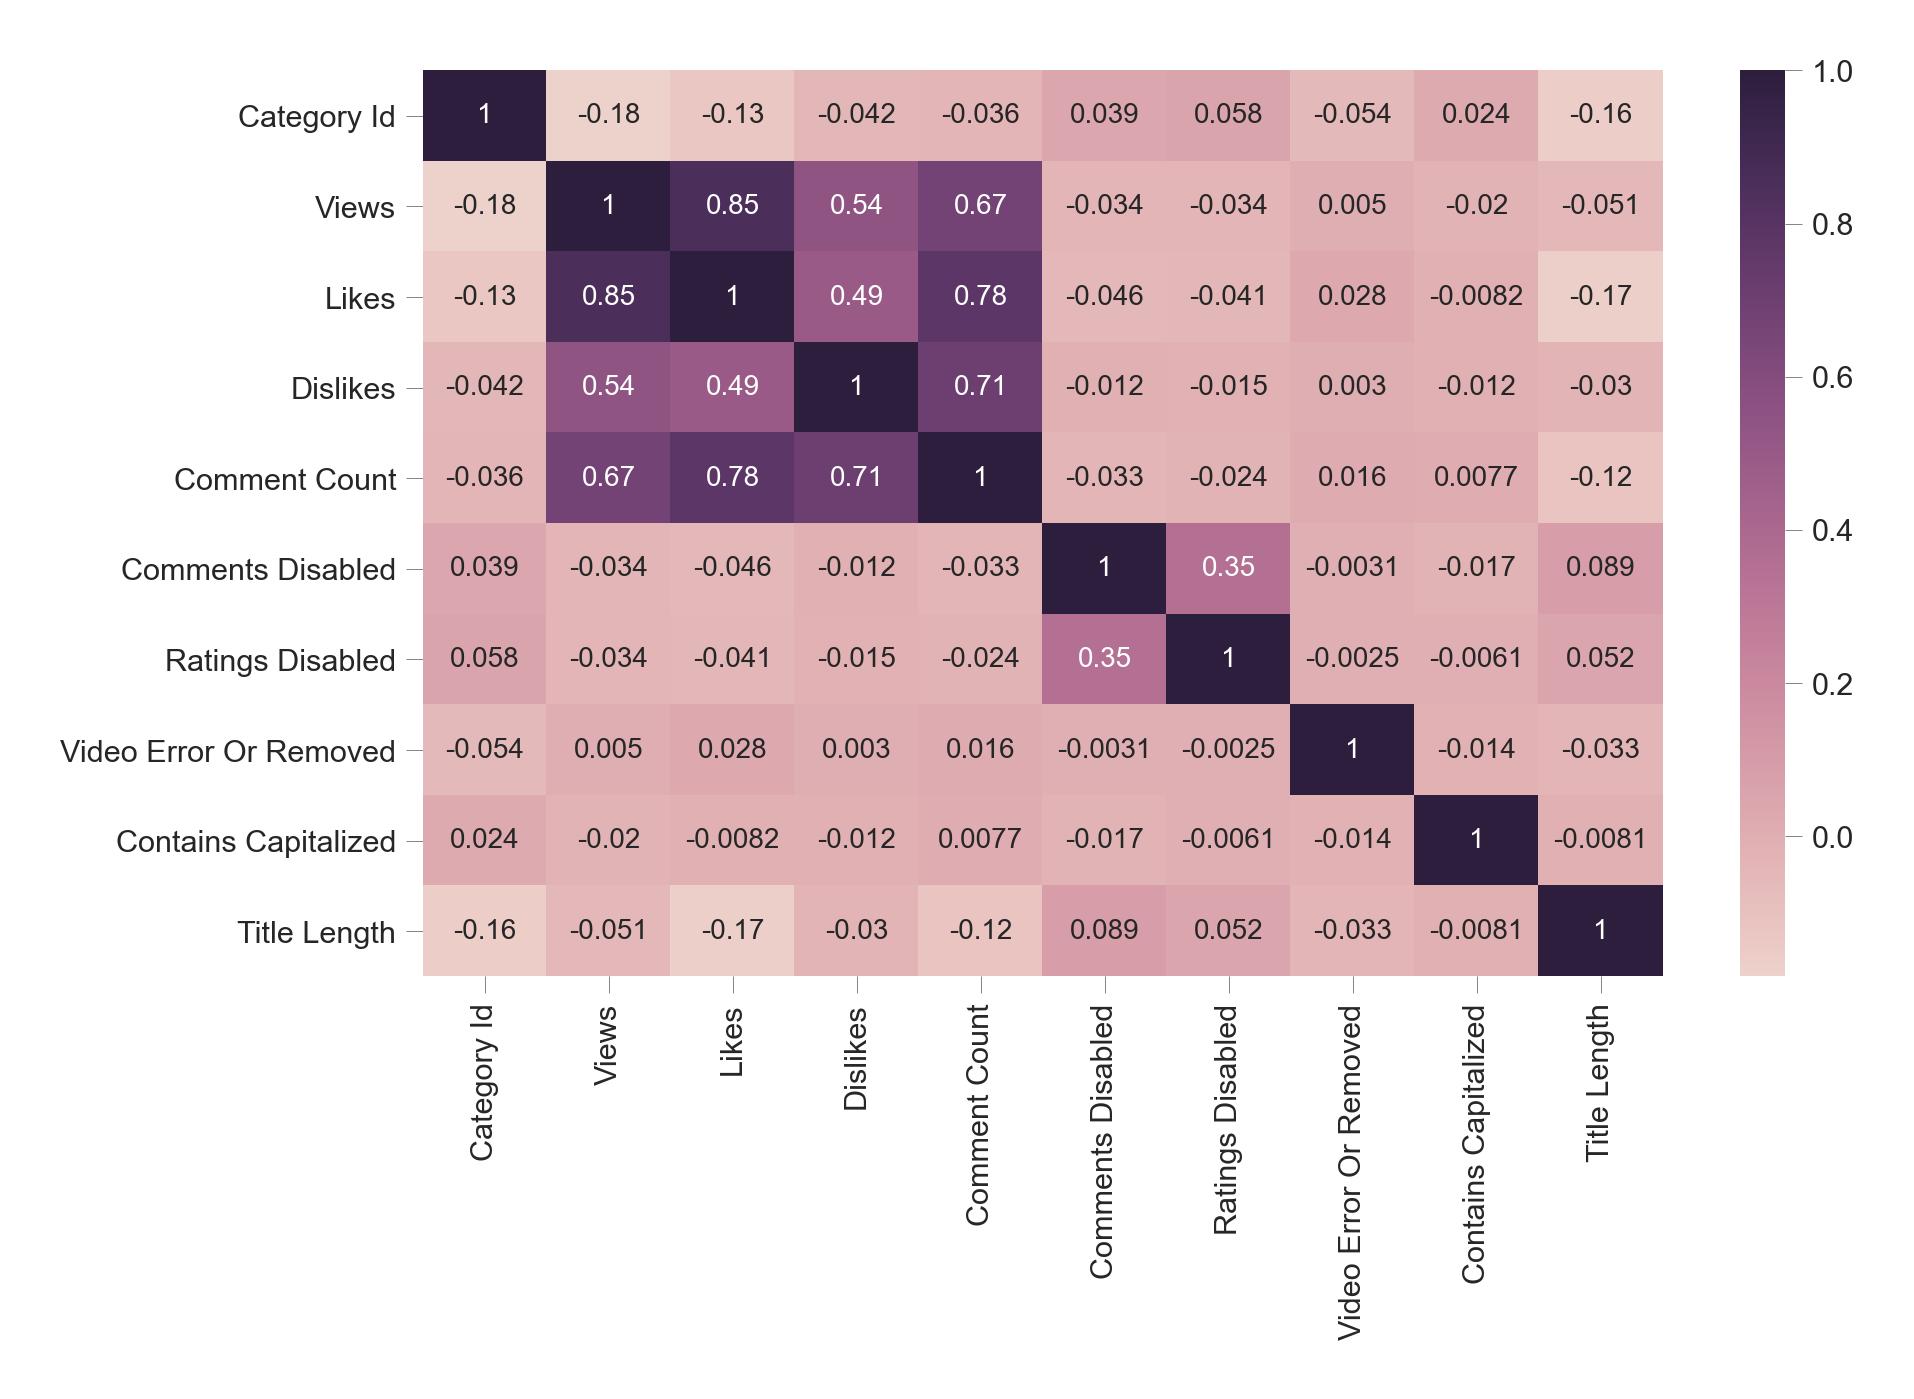

In [174]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. 

Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.

## Channels that have the largest number of trending videos?

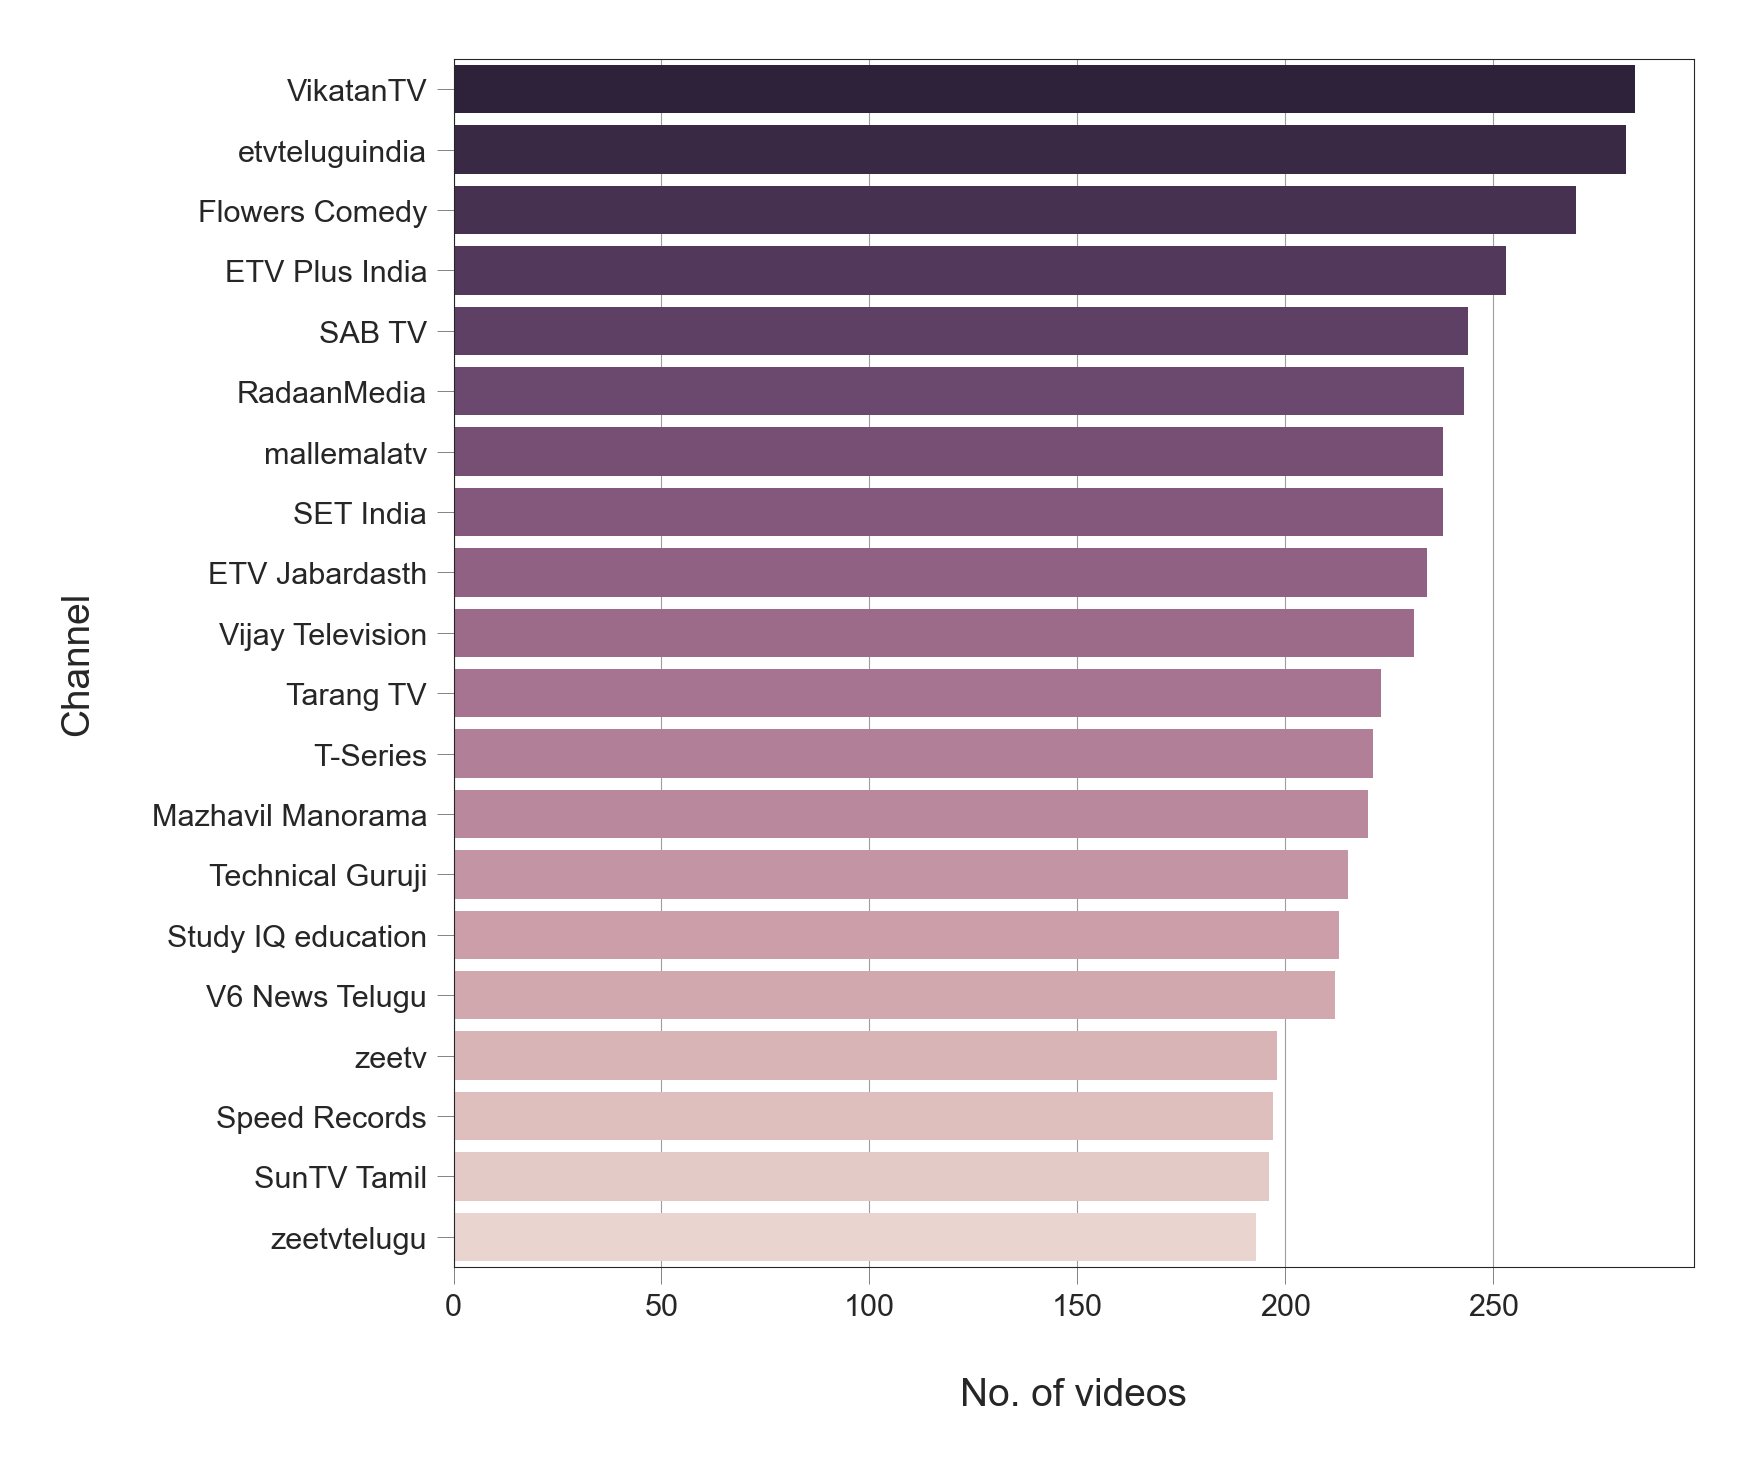

In [178]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")